In [1]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


/lustre/isaac24/scratch/mhe8/myenv2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


In [3]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor().fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)


 95%|=================== | 3917/4128 [00:18<00:00]       

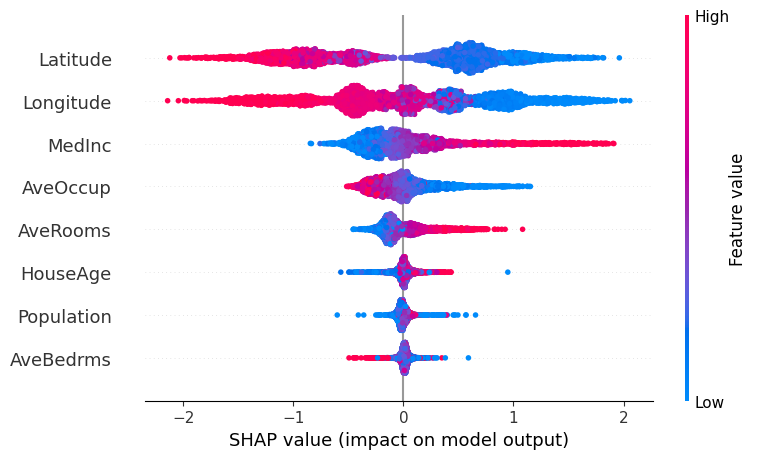

In [4]:

# Plot the summary plot
shap.summary_plot(shap_values, X_test)


In [5]:
# Plot the dependence plot for a specific feature
shap.dependence_plot("MedInc", shap_values, X_test)

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [ ]:

# Plot the force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


In [ ]:

# Plot the waterfall plot for a single prediction
shap.waterfall_plot(shap_values[0])

In [ ]:
shap_values

In [ ]:
y

In [11]:
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import StratifiedKFold

In [40]:
# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Set up 5-fold cross-validation
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Compute accuracy
#acc = accuracy_score(y_test, y_pred)
#accuracies.append(acc)
#print(f"  Accuracy: {acc:.4f}")

# Compute SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values2 = explainer.shap_values(X_test)




In [41]:
print(len(shap_values2))  # Should print 3 (one array per class),but it is len(X_test)
print(shap_values2[0].shape)  # Should be (len(X_test), num_features),but it is (num_features,# of class)


30
(4, 3)


In [42]:
shap_values2.shape

(30, 4, 3)

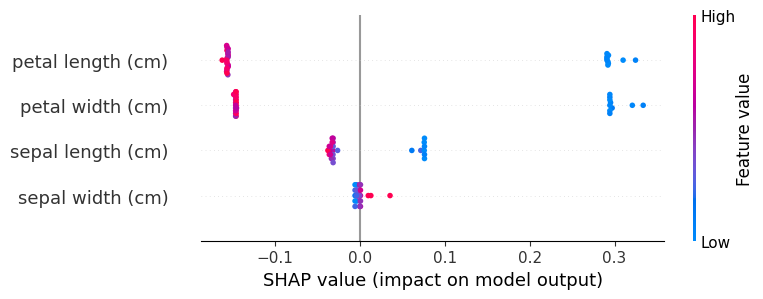

In [44]:
shap.summary_plot(shap_values2[:,:,0], X_test)

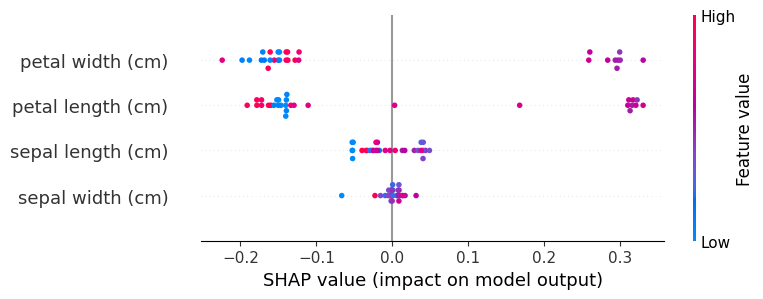

In [45]:
shap.summary_plot(shap_values2[:,:,1], X_test)

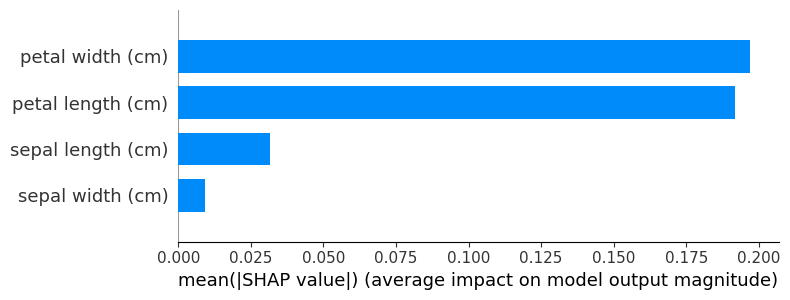

In [49]:
shap.summary_plot(shap_values2[:,:,1], X_test, plot_type="bar")

In [57]:
shap_values2[:,:,1].shape

(30, 4)

In [59]:
np.abs(pd.DataFrame(shap_values2[:,:,1]).values).mean(0)

array([0.03158206, 0.0092495 , 0.19186848, 0.19701843])

In [54]:
feature_names = X_train.columns


for i in range(3):
    rf_resultX = pd.DataFrame(shap_values2[:,:,i], columns = feature_names)
    
    vals = np.abs(rf_resultX.values).mean(0)
    
    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance.head())

            col_name  feature_importance_vals
2  petal length (cm)                 0.202934
3   petal width (cm)                 0.197616
0  sepal length (cm)                 0.043794
1   sepal width (cm)                 0.004082
            col_name  feature_importance_vals
3   petal width (cm)                 0.197018
2  petal length (cm)                 0.191868
0  sepal length (cm)                 0.031582
1   sepal width (cm)                 0.009249
            col_name  feature_importance_vals
2  petal length (cm)                 0.204721
3   petal width (cm)                 0.196719
0  sepal length (cm)                 0.031883
1   sepal width (cm)                 0.010042


Each sample has its own shap value for each feature; the shap value tells you how much that feature has contributed to the prediction for that particular sample; this is called a local explanation. You could average shap values for each feature to get a feeling of global feature importance, but I'd suggest you take a look at the documentation since the shap package itself provides much more powerful visualizations/interpretations.